In [2]:
import netCDF4
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Applications/anaconda3/envs/eas2900/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#Read in Data
data=xr.open_mfdataset('/Users/dylanwright/Desktop/eas3050/2017-2022-mendocino.nc')

In [4]:
#View Data
data

<xarray.Dataset> Size: 3GB
Dimensions:                                       (time: 2069, lat: 382,
                                                   lon: 301)
Coordinates:
  * time                                          (time) object 17kB 2017-01-...
  * lat                                           (lat) float64 3kB 40.59 ......
  * lon                                           (lon) float64 2kB -123.6 .....
Data variables:
    crs                                           int8 1B ...
    Albedo_BSA_shortwave                          (time, lat, lon) float64 2GB dask.array<chunksize=(414, 77, 61), meta=np.ndarray>
    BRDF_Albedo_Band_Mandatory_Quality_shortwave  (time, lat, lon) float32 952MB dask.array<chunksize=(414, 77, 61), meta=np.ndarray>
Attributes:
    title:        MCD43A3.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.67
    references:   See README.md
    history:      See README.md

In [5]:
#Define latitude and longitude range, extract data from them
men_lat=slice(39.8,39.1)
men_lon=slice(-123.3,-122.5)
south_mendocino_data=data.sel(lat=men_lat,lon=men_lon)

In [6]:
#View extracted data
south_mendocino_data

<xarray.Dataset> Size: 801MB
Dimensions:                                       (time: 2069, lat: 168,
                                                   lon: 192)
Coordinates:
  * time                                          (time) object 17kB 2017-01-...
  * lat                                           (lat) float64 1kB 39.8 ... ...
  * lon                                           (lon) float64 2kB -123.3 .....
Data variables:
    crs                                           int8 1B ...
    Albedo_BSA_shortwave                          (time, lat, lon) float64 534MB dask.array<chunksize=(414, 40, 41), meta=np.ndarray>
    BRDF_Albedo_Band_Mandatory_Quality_shortwave  (time, lat, lon) float32 267MB dask.array<chunksize=(414, 40, 41), meta=np.ndarray>
Attributes:
    title:        MCD43A3.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.67
    references:   See README.md
    history:      See README.md

In [7]:
#Average albedo over extracted area
south_mendocino_data_mean=south_mendocino_data.mean(dim=["lat","lon"])

In [8]:
#Convert DatetimeJulian to Datetime Object
datetimeindex = south_mendocino_data_mean.indexes['time'].to_datetimeindex()
south_mendocino_data_mean["time"]=datetimeindex

/var/folders/rv/48x6d4k15sdgy2m8ldn1r7hh0000gn/T/ipykernel_52777/2480817235.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = south_mendocino_data_mean.indexes['time'].to_datetimeindex()


In [9]:
#Define start and end dates for immediate graph
start = "2018-07-01"
end="2019-07-01"

#Define start and end times of fire
fire_start=datetime.strptime("2018-07-27","%Y-%m-%d")
fire_end=datetime.strptime("2018-09-18","%Y-%m-%d")

#Slice data based on start and end time
sliced_data=south_mendocino_data_mean.sel(time=slice(start,end))

Text(2018-09-18 00:00:00, <xarray.DataArray 'Albedo_BSA_shortwave' ()> Size: 8B
dask.array<add, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 2018-09-18, 'End of Fire')

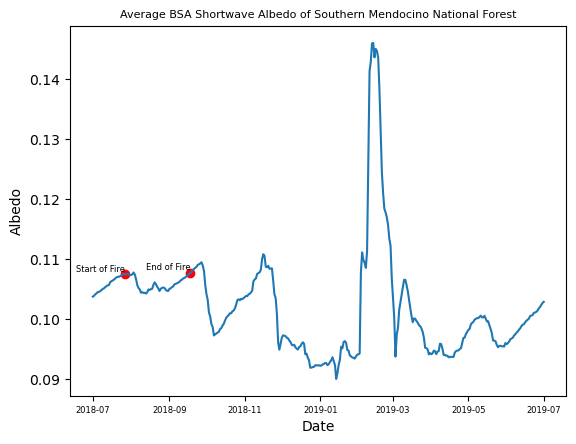

In [13]:
#Plot immediate data and points of start/end of fire
plt.plot(sliced_data["time"],sliced_data["Albedo_BSA_shortwave"])
plt.xlabel('Date', fontsize=10) 
plt.ylabel('Albedo', fontsize=10)
plt.xticks(fontsize=6)
plt.title('Average BSA Shortwave Albedo of Southern Mendocino National Forest', fontsize=8)
plt.scatter(fire_start,sliced_data.sel(time=fire_start)["Albedo_BSA_shortwave"],color="red")
plt.text(fire_start,sliced_data.sel(time=fire_start)["Albedo_BSA_shortwave"]+0.0005,s="Start of Fire",ha="right",size=6)
plt.scatter(fire_end,sliced_data.sel(time=fire_end)["Albedo_BSA_shortwave"],color="red")
plt.text(fire_end,sliced_data.sel(time=fire_end)["Albedo_BSA_shortwave"]+0.0005,s="End of Fire",ha="right",size=6)

Text(2018-09-18 00:00:00, <xarray.DataArray 'Albedo_BSA_shortwave' ()> Size: 8B
dask.array<add, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 2018-09-18, 'End')

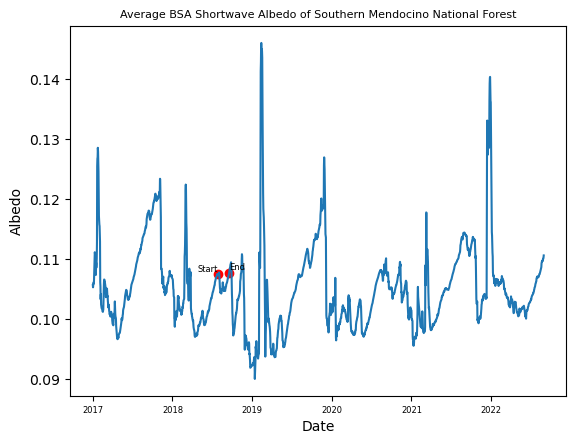

In [19]:
#Plot prolonged data and points of start/end fire
plt.plot(south_mendocino_data_mean["time"],south_mendocino_data_mean["Albedo_BSA_shortwave"])
plt.xlabel('Date', fontsize=10) 
plt.ylabel('Albedo', fontsize=10)
plt.xticks(fontsize=6)
plt.title("Average BSA Shortwave Albedo of Southern Mendocino National Forest", fontsize=8)
plt.scatter(fire_start,sliced_data.sel(time=fire_start)["Albedo_BSA_shortwave"],color="red")
plt.text(fire_start,sliced_data.sel(time=fire_start)["Albedo_BSA_shortwave"]+0.0005,s="Start",ha="right",size=6)
plt.scatter(fire_end,sliced_data.sel(time=fire_end)["Albedo_BSA_shortwave"],color="red")
plt.text(fire_end,sliced_data.sel(time=fire_end)["Albedo_BSA_shortwave"]+0.0005,s="End",ha="left",size=6)